# 使用Tensorflow完成基本的模型分类



In [66]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

Using TensorFlow backend.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

## 导入数据集

XO数据集是从EMNIST数据集经过预处理得到的，只筛选XO相关的数据,并且将向量转换为了2D图像。
直接导入序列化后的数据集二进制文件。

In [42]:
import pickle

dataset = None

with open('../../common/xo_dataset.bin', 'rb') as f:
    dataset = pickle.load(f)

dataset是一个字典格式的数据

In [41]:
list(dataset.keys())

['train_images', 'train_labels', 'test_images', 'test_labels']

从字典里面提取训练集与测试集

In [39]:
# 训练集图像向量
train_images = dataset['train_images']
# 训练集标签
train_labels = dataset['train_labels']
# 测试集图像向量
test_images = dataset['test_images']
# 测试集标签
test_labels = dataset['test_labels']

每个样本图片的尺寸是28x28的灰度图

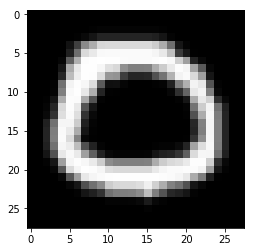

In [52]:
#　字符O的样例图片
plt.imshow(train_images[0], cmap='gray')

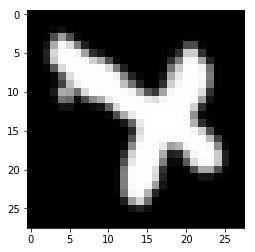

In [54]:
# 字符X的样例图片
plt.imshow(train_images[3], cmap='gray')

训练集里面各4800个样本

测试集里面个800个样本

In [45]:
train_images.shape

(9600, 28, 28)

In [47]:
test_images.shape

(1600, 28, 28)

关于label数据，标签数据数值范围是0-1, 0代表字符`O`, 1代表字符`X`

In [49]:
train_labels

array([0, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [51]:
test_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

## 数据预处理


### 归一化
将样本数据原来`0-255`数值范围的整数格式`uint8`，转换为`0-1.0`的浮点数`float32`。

In [56]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 构造onehot矩阵

In [67]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [68]:
train_labels[0]

array([1., 0.], dtype=float32)

## 构建模型

构建神经网络需要先配置模型的层，然后再编译模型。

### 设置神经网络结构

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


### 编译模型

In [91]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 训练模型

In [92]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
9600/9600 [==============================] - 1s 139us/sample - loss: 0.0021 - acc: 0.9992
Epoch 2/5
9600/9600 [==============================] - 1s 123us/sample - loss: 0.0040 - acc: 0.9989
Epoch 3/5
9600/9600 [==============================] - 1s 123us/sample - loss: 7.9745e-04 - acc: 0.9998
Epoch 4/5
9600/9600 [==============================] - 1s 123us/sample - loss: 1.7568e-04 - acc: 1.0000
Epoch 5/5
9600/9600 [==============================] - 1s 118us/sample - loss: 1.0311e-05 - acc: 1.0000


## 模型评估

In [93]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

1600/1600 [==============================] - 0s 79us/sample - loss: 0.0147 - acc: 0.9975
Test accuracy: 0.9975


## 模型预测

In [94]:
# 读入样本数据
demo_sample = test_images[8]

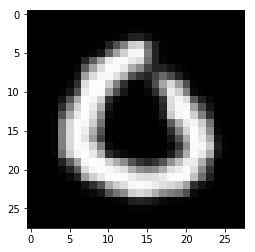

In [95]:
# 显示图片
demo_image = (demo_sample * 255.0).astype('uint8')
plt.imshow(demo_image, cmap='gray')

In [96]:
model.predict(np.array([demo_sample]))

array([[1.0000000e+00, 2.1087469e-11]], dtype=float32)

In [97]:
predict_result = model.predict(np.array([demo_sample]))[0]
label_id = np.argmax(predict_result)

In [98]:
label_id

0

In [99]:
## 打印预测结果
label_letter_list = ['O', 'X']
print('预测结果为: {}'.format(label_letter_list[label_id]))

预测结果为: O


## 模型保存
Keras的模型文件名后缀是h5

In [103]:
model.save('xo_nn_model.h5')

## Reference

[tensorflow doc:basic_classification](https://www.tensorflow.org/tutorials/keras/basic_classification)